# Evaluating k-NN Classifier

In [2]:
from pandas import read_csv
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

## Here we read the data 
breast_cancer = read_csv('wisconsin_breast_cancer.csv')

## Here we select the variables of interest
breast_cancer = breast_cancer[['diagnosis', 'area_worst', 'radius_worst',  
                               'compactness_worst']]

## Here we recode diagnosis
breast_cancer['diagnosis'] = breast_cancer.diagnosis.map({'B':0, 'M':1})

## Here we define the predictors and target 
X = breast_cancer[['area_worst', 'radius_worst', 'compactness_worst']]
Y = breast_cancer[['diagnosis']]

## Here we create the MinMaxScaler object
scaler = MinMaxScaler()

## Here we normalize the predictor variables
X = scaler.fit_transform(X)

## Here we split the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, 
                                                          random_state = 8)

## Here we fit a three nearest neighbor to the data 
three_nearest_neighbors = KNeighborsClassifier(n_neighbors = 3).fit(X_train, 
                                                                    Y_train)

## Here we predict on the testing data 
three_nearest_neighbors_preds = three_nearest_neighbors.predict(X_test)  

## Here we evaluate the performance of the model
print('The confusion matrix is:')
print(confusion_matrix(three_nearest_neighbors_preds, Y_test))
print('The accuracy is: ', accuracy_score(three_nearest_neighbors_preds, Y_test))
print('Classification report:')
print(classification_report(three_nearest_neighbors_preds, Y_test))

The confusion matrix is:
[[100   9]
 [  5  57]]
The accuracy is:  0.9181286549707602
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       109
           1       0.86      0.92      0.89        62

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171



/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Evaluating Random Forest Classifier

In [3]:
from sklearn.ensemble import RandomForestClassifier

## Here we create the random forest object
random_forest = RandomForestClassifier()

## Here we fit the random forest to the training set
rf_md = random_forest.fit(X_train, Y_train)

## Here we use the random forest to predict on test set
rf_preds = rf_md.predict(X_test)

## Here we evaluate the performance of the model
print('The confusion matrix is:')
print(confusion_matrix(rf_preds, Y_test))
print('The accuracy is: ', accuracy_score(rf_preds, Y_test))
print('Classification report:')
print(classification_report(rf_preds, Y_test))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


The confusion matrix is:
[[100   7]
 [  5  59]]
The accuracy is:  0.9298245614035088
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.89      0.92      0.91        64

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



# Evaluating Gradient Boosting Classifier

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

## Here we create the gradient boost model object
boosting_classifier = GradientBoostingClassifier(n_estimators = 500, 
                                                 max_depth = 3)

## Here we fit the model to the training set 
gbm_md = boosting_classifier.fit(X_train, Y_train)

## Here we predict on the testing data
gbm_preds = gbm_md.predict(X_test)

## Here we evaluate the performance of the model
print('The confusion matrix is:')
print(confusion_matrix(gbm_preds, Y_test))
print('The accuracy is: ', accuracy_score(gbm_preds, Y_test))
print('Classification report:')
print(classification_report(gbm_preds, Y_test))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


The confusion matrix is:
[[101   7]
 [  4  59]]
The accuracy is:  0.935672514619883
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       108
           1       0.89      0.94      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



# Evaluating k-NN Regressor

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from numpy import sqrt
from numpy import mean

## Here we read the data 
auto = read_csv('auto.csv')

## Here we define the predictors and target
X = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
Y = auto[['mpg']]
Y = Y.values.reshape(-1, 1)

## Here we create the MinMaxScaler object
scaler = MinMaxScaler()

## Here normalize the predictors
X = scaler.fit_transform(X)

## Here we split the data into training (70%) and testing (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, 
                                                    random_state = 7)

## Here we fit a three nearest neighbor to the data 
three_nearest_neighbors = KNeighborsRegressor(n_neighbors = 3).fit(X_train, 
                                                                   Y_train)

## Here we predict on the testing data 
three_nearest_neighbors_preds = three_nearest_neighbors.predict(X_test)

## Here we compute the RMSE
RMSE_three_nearest_neighbors_preds = sqrt(mean((three_nearest_neighbors_preds - 
                                                Y_test)**2))
print('The RMSE of the 3-NN is: ', RMSE_three_nearest_neighbors_preds)

## Here we compute the MAE
MAE_three_nearest_neighbors_preds = mean(abs(three_nearest_neighbors_preds - 
                                             Y_test))
print('The RMSE of the 3-NN is: ', MAE_three_nearest_neighbors_preds)

The RMSE of the 3-NN is:  4.18565616291213
The RMSE of the 3-NN is:  3.1


# Evaluating Random Forest Regressor

In [6]:
from sklearn.ensemble import RandomForestRegressor

## Here we create the random forest object
random_forest = RandomForestRegressor()

## Here we fit the random forest to the training set
rf_md = random_forest.fit(X_train, Y_train)

## Here we use the random forest to predict on test set
rf_preds = rf_md.predict(X_test)

## Here we compute the RMSE
RMSE_rf = sqrt(mean((rf_preds - Y_test)**2))
print('The RMSE of the random forest is: ', RMSE_rf)

## Here we compute the MAE
MAE_rf = mean(abs(rf_preds - Y_test))
print('The RMSE of the random forest is: ', MAE_rf) 

The RMSE of the random forest is:  10.868990480064422
The RMSE of the random forest is:  8.832896581442112


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


# Evaluating Grandient Boosting Regressor

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

## Here we create the gradient boost model object
boosting_regressor = GradientBoostingRegressor(n_estimators = 500, 
                                               max_depth = 3)

## Here we fit the model to the training set 
gbm_md = boosting_regressor.fit(X_train, Y_train)

## Here we predict on the testing data
gbm_preds = gbm_md.predict(X_test)

## Here we compute the RMSE
RMSE_gbm = sqrt(mean((gbm_preds - Y_test)**2))
print('The RMSE of the boosted model is: ', RMSE_gbm)

## Here we compute the MAE
MAE_gbm = mean(abs(gbm_preds - Y_test))
print('The RMSE of the boosted model is: ', MAE_gbm) 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


The RMSE of the boosted model is:  10.965808983083548
The RMSE of the boosted model is:  8.88099234995375


# Hyper-parameter Tuning: k-NN Classifier

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A col

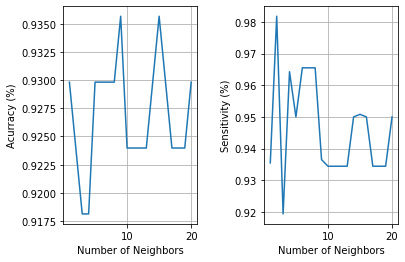

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier

## Here we read the data 
breast_cancer = pd.read_csv('wisconsin_breast_cancer.csv')

## Here we select the variables of interest
breast_cancer = breast_cancer[['diagnosis', 'area_worst', 'radius_worst', 
                               'compactness_worst']]

## Here we recode diagnosis
breast_cancer['diagnosis'] = breast_cancer.diagnosis.map({'B':0, 'M':1})

## Here we define the predictors and target 
X = breast_cancer[['area_worst', 'radius_worst', 'compactness_worst']]
Y = breast_cancer[['diagnosis']]
Y = Y.values.reshape(-1, 1)

## Here we create the MinMaxScaler object
scaler = MinMaxScaler()

## Here we normalize the predictor variables
X = scaler.fit_transform(X)

## Here we split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, 
                                                         random_state = 8)

## Here we define a list to store the results
KNN_results = [3*[0] for i in range(20)]

## Here we compute the model performance for the 
## different number of neighbors
for i in range(20):
    KNN = KNeighborsClassifier(n_neighbors = i+1).fit(X_train, Y_train)
    KNN_preds = KNN.predict(X_test)
    KNN_results[i][0] = (i+1)
    KNN_results[i][1] = accuracy_score(KNN_preds, Y_test)
    KNN_results[i][2] = recall_score(KNN_preds, Y_test)

## Here we convert the result to a data frame    
KNN_results = pd.DataFrame(KNN_results)

fig, (plot1, plot2) = plt.subplots(1, 2)
fig.subplots_adjust(wspace = 0.5)

## Here we visualize the Accuracy
plot1.plot(KNN_results[0], KNN_results[1])
plot1.set(xlabel = 'Number of Neighbors', ylabel = 'Acurracy (%)')
plot1.grid()

plot2.plot(KNN_results[0], KNN_results[2])
plot2.set(xlabel = 'Number of Neighbors', ylabel = 'Sensitivity (%)')
plot2.grid()    

# Hyper-parameter Tuning: Random Forest Classifier

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

## Here we read the data 
breast_cancer = pd.read_csv('wisconsin_breast_cancer.csv')

## Here we select the variables of interest
breast_cancer = breast_cancer[['diagnosis', 'area_worst', 'radius_worst', 
                               'compactness_worst']]

## Here we recode diagnosis
breast_cancer['diagnosis'] = breast_cancer.diagnosis.map({'B':0, 'M':1})

## Here we define the predictors and target 
X = breast_cancer[['area_worst', 'radius_worst', 'compactness_worst']]
Y = breast_cancer[['diagnosis']]

## Here we split the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, 
                                                          random_state = 8)

## Here we declare the number of trees that we'll consider
n_trees = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500]

## Here we declare the list to store results
tree_size = []
rf_accuracy = []
rf_recall = []

for tree in n_trees:
    
    ## Here we create the random forest object
    random_forest = RandomForestClassifier(n_estimators = tree)
    
    ## Here we train the random forest
    rf_md = random_forest.fit(X_train, Y_train)
    
    ## Here we predict on the test set
    rf_preds = rf_md.predict(X_test)
    
    ## Here we store the results
    tree_size.append(tree)
    rf_accuracy.append(accuracy_score(rf_preds, Y_test))
    rf_recall.append(recall_score(rf_preds, Y_test))
    
## Here we import DataFrame from pandas
RF_Results = pd.DataFrame({'Number_of_Trees': tree_size, 
                        'Accuracy': rf_accuracy, 
                        'Recall': rf_recall})

## Here we can see the results
RF_Results

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/ec2-us

,Number_of_Trees,Accuracy,Recall
0,1,0.935673,0.923077
1,5,0.923977,0.934426
2,10,0.941520,0.966667
3,20,0.918129,0.893939
4,30,0.929825,0.935484
5,40,0.923977,0.920635
6,50,0.923977,0.934426
7,60,0.923977,0.934426
8,70,0.935673,0.936508
9,80,0.935673,0.923077


# Hyper-parameter Tuning: Gradient Boosting Classifier

In [12]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

## Here we read the data 
breast_cancer = pd.read_csv('wisconsin_breast_cancer.csv')

## Here we select the variables of interest
breast_cancer = breast_cancer[['diagnosis', 'area_worst', 'radius_worst', 
                               'compactness_worst']]

## Here we recode diagnosis
breast_cancer['diagnosis'] = breast_cancer.diagnosis.map({'B':0, 'M':1})

## Here we define the predictors and target 
X = breast_cancer[['area_worst', 'radius_worst', 'compactness_worst']]
Y = breast_cancer[['diagnosis']]

## Here we split the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, 
                                                          random_state = 8)

## Here we declare the number of trees that we'll consider
n_trees = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500]

## Here we declare the depths to be considered
n_depths = [2, 3, 4, 5, 6]

## Here we declare the list to store results
gbm_accuracy = []
gbm_recall = []

for tree in n_trees:
    
    for depth in n_depths:

        ## Here we create the random forest object
        gbm = GradientBoostingClassifier(n_estimators = tree, max_depth = depth)

        ## Here we train the random forest
        gbm_md = gbm.fit(X_train, Y_train)

        ## Here we predict on the test set
        gbm_preds = gbm_md.predict(X_test)
    
        ## Here we store the results
        gbm_accuracy.append(accuracy_score(gbm_preds, Y_test))
        gbm_recall.append(recall_score(gbm_preds, Y_test))

## Here we put together the results
GBM_Results = [(x, y) for x in n_trees for y in n_depths]
GBM_Results = pd.DataFrame(GBM_Results)
GBM_Results.columns = ['Number_of_Trees', 'Depth']

GBM_Results['Accuracy'] = gbm_accuracy
GBM_Results['Sensitivity'] = gbm_recall

## Here we can see the results
GBM_Results

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when

,Number_of_Trees,Depth,Accuracy,Sensitivity
0,5,2,0.929825,0.965517
1,5,3,0.918129,0.948276
2,5,4,0.923977,0.949153
3,5,5,0.923977,0.949153
4,5,6,0.923977,0.949153
...,...,...,...,...
70,500,2,0.935673,0.936508
71,500,3,0.941520,0.937500
72,500,4,0.923977,0.907692
73,500,5,0.923977,0.895522
